In [ ]:
# Summary: This uses publically available data in order to apply the common technique of PCA.

In [96]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [ ]:
# Code Outline
# 1. Data read in
# 2. Data Prep
# 3. PCA Analysis

In [98]:
# data read in and prep
ben_sum_2008_2 = pd.read_csv("~/clients/anomaly/projects/test/data/SynPUFDataFiles/DE1_0_2008_Beneficiary_Summary_File_Sample_2.csv")
carrier_claims_08_10_2A = pd.read_csv("~/clients/anomaly/projects/test/data/SynPUFDataFiles/DE1_0_2008_to_2010_Carrier_Claims_Sample_2A.csv")
hcpc_list=['99211', '99212', '99213', '99214', '99215']
df = carrier_claims_08_10_2A
df = df[df['HCPCS_CD_1'].isin(hcpc_list)]
df['severity'] = 0
df.severity[df.HCPCS_CD_1 == '99211'] = 1
df.severity[df.HCPCS_CD_1 == '99212'] = 2
df.severity[df.HCPCS_CD_1 == '99213'] = 3
df.severity[df.HCPCS_CD_1 == '99214'] = 4
df.severity[df.HCPCS_CD_1 == '99215'] = 5
df_ad = df[['DESYNPUF_ID',
            'CLM_ID', 
            'CLM_FROM_DT',
            'HCPCS_CD_1',
            'ICD9_DGNS_CD_1', 
            'PRF_PHYSN_NPI_1',
            'severity'
            ]].merge(ben_sum_2008_2, left_on='DESYNPUF_ID', right_on='DESYNPUF_ID',
                how='left')
# identify providers that have at leat 25 records
ct = pd.DataFrame(df_ad.groupby('PRF_PHYSN_NPI_1')['CLM_ID'].count()).reset_index()
ct.columns = ['PRF_PHYSN_NPI_1', 'CLM_CT']
df_ad = ct.merge(df_ad, left_on='PRF_PHYSN_NPI_1', right_on='PRF_PHYSN_NPI_1')
sample = df_ad[df_ad['CLM_CT']>=25]
pca_ad = sample.groupby('PRF_PHYSN_NPI_1')[['SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
 'SP_CNCR',
 'SP_COPD',
 'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
 'SP_STRKETIA',
 'MEDREIMB_IP',
 'BENRES_IP',
 'PPPYMT_IP',
 'MEDREIMB_OP',
 'BENRES_OP',
 'PPPYMT_OP',
 'MEDREIMB_CAR',
 'BENRES_CAR',
 'PPPYMT_CAR']].mean().reset_index()[['SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
 'SP_CNCR',
 'SP_COPD',
 'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
 'SP_STRKETIA',
 'MEDREIMB_IP',
 'BENRES_IP',
 'PPPYMT_IP',
 'MEDREIMB_OP',
 'BENRES_OP',
 'PPPYMT_OP',
 'MEDREIMB_CAR',
 'BENRES_CAR',
 'PPPYMT_CAR']]

<ipython-input-98-b37036b1b587>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['severity'] = 0
<ipython-input-98-b37036b1b587>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.severity[df.HCPCS_CD_1 == '99211'] = 1
<ipython-input-98-b37036b1b587>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.severity[df.HCPCS_CD_1 == '99212'] = 2
<ipython-input-98-b37036b1b587>:10: 

In [101]:
pca_ad

,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,1.500000,1.461538,1.653846,1.730769,1.807692,1.500000,1.461538,1.307692,1.769231,1.692308,1.923077,1742.307692,157.538462,0.000000,825.769231,209.615385,0.000000,2257.692308,667.692308,15.000000
1,1.740741,1.641975,1.790123,1.888889,1.790123,1.691358,1.456790,1.493827,1.703704,1.777778,1.888889,4625.555556,493.037037,37.037037,875.555556,253.456790,49.382716,1740.370370,520.617284,49.506173
2,1.724138,1.505747,1.747126,1.850575,1.747126,1.620690,1.436782,1.344828,1.724138,1.724138,1.942529,2303.908046,353.103448,0.000000,772.873563,283.448276,1.379310,2032.068966,589.425287,53.103448
3,1.600000,1.542857,1.628571,1.885714,1.828571,1.542857,1.257143,1.285714,1.514286,1.742857,1.914286,4297.142857,533.828571,0.000000,1400.857143,546.571429,0.000000,2462.857143,663.714286,30.285714
4,1.685714,1.442857,1.600000,1.857143,1.771429,1.628571,1.271429,1.357143,1.771429,1.728571,1.928571,7814.285714,961.028571,0.000000,1150.000000,336.714286,2.285714,2411.428571,649.714286,34.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,1.607143,1.321429,1.750000,1.857143,1.500000,1.464286,1.107143,1.142857,1.500000,1.500000,1.821429,6628.214286,833.142857,0.000000,1109.285714,331.071429,0.000000,2731.785714,743.214286,29.642857
548,1.630952,1.404762,1.690476,1.857143,1.714286,1.666667,1.309524,1.261905,1.678571,1.666667,1.916667,5615.357143,451.047619,238.095238,1781.190476,504.047619,24.285714,2506.904762,696.071429,40.000000
549,1.662495,1.496972,1.672588,1.870408,1.716996,1.624142,1.334679,1.298345,1.705289,1.696003,1.908357,4574.222850,500.867985,268.469923,1225.401696,387.387969,60.730723,2349.406540,658.292289,36.996367
550,1.606061,1.575758,1.757576,1.727273,1.666667,1.454545,1.272727,1.303030,1.545455,1.575758,1.878788,3434.545455,279.272727,0.000000,715.454545,282.727273,0.000000,2737.878788,735.454545,21.212121


In [ ]:
# PCA only on 2 dimensions

In [306]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array(pca_ad[['SP_ALZHDMTA', 'SP_CHF']])#,'SP_CHRNKIDN', 'SP_CNCR']])#array([[1, 2], [3, 4], [5, 6], [7,8], [9,10]])
print(A)
M = mean(A.T, axis=1)
C = A - M
print(C)

# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

#create normalized df to help with plotting
normalized = pd.DataFrame(C)
normalized.columns = ['SP_ALZHDMTA','SP_CHF']

[[1.5        1.46153846]
 [1.74074074 1.64197531]
 [1.72413793 1.50574713]
 ...
 [1.66249495 1.49697214]
 [1.60606061 1.57575758]
 [1.5915493  1.42253521]]
[1.66959882 1.49965513]
[[-0.16959882 -0.03811667]
 [ 0.07114192  0.14232018]
 [ 0.05453911  0.00609199]
 ...
 [-0.00710387 -0.00268299]
 [-0.06353822  0.07610244]
 [-0.07804953 -0.07711992]]
[[0.00596691 0.00148929]
 [0.00148929 0.00620561]]
[[-0.7348081  -0.67827506]
 [ 0.67827506 -0.7348081 ]]
[0.0045922  0.00758032]
[[ 0.098769    0.14304309]
 [ 0.04425657 -0.15283181]
 [-0.03594373 -0.04146896]
 ...
 [ 0.00340018  0.00678986]
 [ 0.09830679 -0.0128243 ]
 [ 0.00504291  0.10960739]]


In [359]:
# eigen vectors
vectors 

array([[-0.7348081 , -0.67827506],
       [ 0.67827506, -0.7348081 ]])

In [356]:
# eigen values
values # these are the explained variances sounrce: https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained
# all four components account for all variablity in the data

array([0.0045922 , 0.00758032])

In [357]:
sum(values) # this is total variablility in the data


0.012172519655196326

In [358]:
#first component accounts for 37.9%
values[0]/sum(values)

0.37725938904349454

In [311]:
pd.DataFrame(P.T)

,0,1
0,0.098769,0.143043
1,0.044257,-0.152832
2,-0.035944,-0.041469
3,0.080445,0.015462
4,-0.050366,0.030805
...,...,...
547,-0.074993,0.173325
548,-0.035966,0.095941
549,0.003400,0.006790
550,0.098307,-0.012824


In [116]:
# compare PCA function to above results
pca = PCA()
components = pca.fit_transform(pca_ad[['SP_ALZHDMTA', 'SP_CHF']]) 
pd.DataFrame(components)

,0,1
0,0.143043,-0.098769
1,-0.152832,-0.044257
2,-0.041469,0.035944
3,0.015462,-0.080445
4,0.030805,0.050366
...,...,...
547,0.173325,0.074993
548,0.095941,0.035966
549,0.006790,-0.003400
550,-0.012824,-0.098307


In [ ]:
# source: https://ourarchive.otago.ac.nz/bitstream/handle/10523/7534/OUCS-2002-12.pdf?sequence=1&isAllowed=y

In [119]:
# Plot Eigen Vectors

[0.50389351 0.62606147 0.59509526]
[ 0.85964469 -0.29626242 -0.41622059]


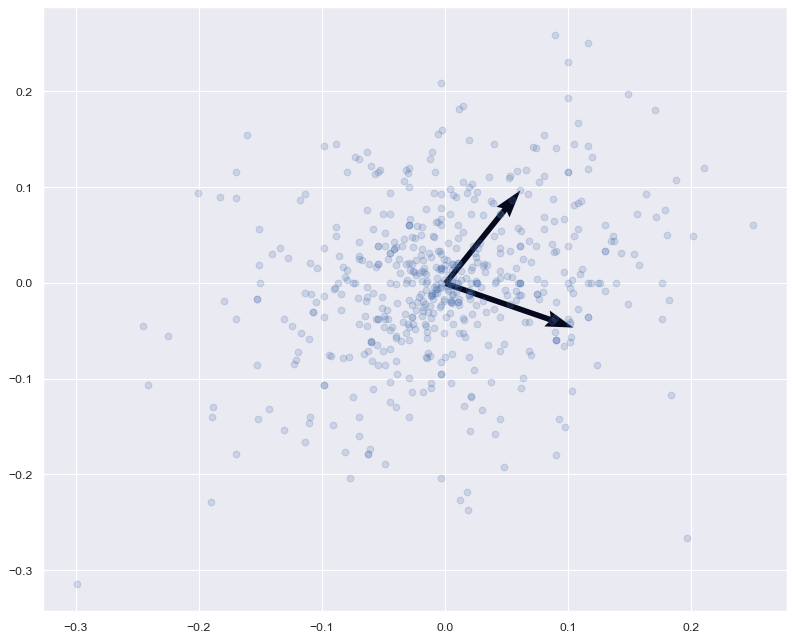

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import linalg as LA

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
origin = [0, 0]

eig_vec1 = vectors[:,0]
eig_vec2 = vectors[:,1]

print(eig_vec1)
print(eig_vec2)


plt.quiver(*origin, *eig_vec1, color=['r'], scale=5, alpha=.99)
plt.quiver(*origin, *eig_vec2, color=['y'], scale=5, alpha=.99)
plt.scatter(normalized['SP_ALZHDMTA'],normalized['SP_CHF'], alpha=0.20)
plt.show()


In [ ]:
# add another dimension - 3

In [121]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array(pca_ad[['SP_ALZHDMTA', 'SP_CHF','SP_CHRNKIDN']])#, 'SP_CNCR']])#array([[1, 2], [3, 4], [5, 6], [7,8], [9,10]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means - a method of scaling - so skip for now
C = A - M
print(C)

# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

#create normalized df to help with plotting
normalized = pd.DataFrame(C)
normalized.columns = ['SP_ALZHDMTA','SP_CHF','SP_CHRNKIDN']

[[1.5        1.46153846 1.65384615]
 [1.74074074 1.64197531 1.79012346]
 [1.72413793 1.50574713 1.74712644]
 ...
 [1.66249495 1.49697214 1.67258781]
 [1.60606061 1.57575758 1.75757576]
 [1.5915493  1.42253521 1.67605634]]
[1.66959882 1.49965513 1.67953089]
[[-0.16959882 -0.03811667 -0.02568474]
 [ 0.07114192  0.14232018  0.11059257]
 [ 0.05453911  0.00609199  0.06759555]
 ...
 [-0.00710387 -0.00268299 -0.00694308]
 [-0.06353822  0.07610244  0.07804487]
 [-0.07804953 -0.07711992 -0.00347455]]
[[0.00596691 0.00148929 0.00132709]
 [0.00148929 0.00620561 0.00208331]
 [0.00132709 0.00208331 0.00606913]]
[[ 0.50389351  0.85964469  0.08427531]
 [ 0.62606147 -0.29626242 -0.72130134]
 [ 0.59509526 -0.41622059  0.68747513]]
[0.00938455 0.0048111  0.004046  ]
[[-0.12460799 -0.12381168 -0.004457  ]
 [ 0.19076224 -0.02703825 -0.02063059]
 [ 0.07152165  0.01694477  0.04667239]
 ...
 [-0.00939111 -0.00242208 -0.00343663]
 [ 0.06207244 -0.10965047 -0.00659359]
 [-0.08967815 -0.04280095  0.04666039]]


In [122]:
vectors

array([[ 0.50389351,  0.85964469,  0.08427531],
       [ 0.62606147, -0.29626242, -0.72130134],
       [ 0.59509526, -0.41622059,  0.68747513]])

In [123]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


In [124]:
vectors

array([[ 0.50389351,  0.85964469,  0.08427531],
       [ 0.62606147, -0.29626242, -0.72130134],
       [ 0.59509526, -0.41622059,  0.68747513]])

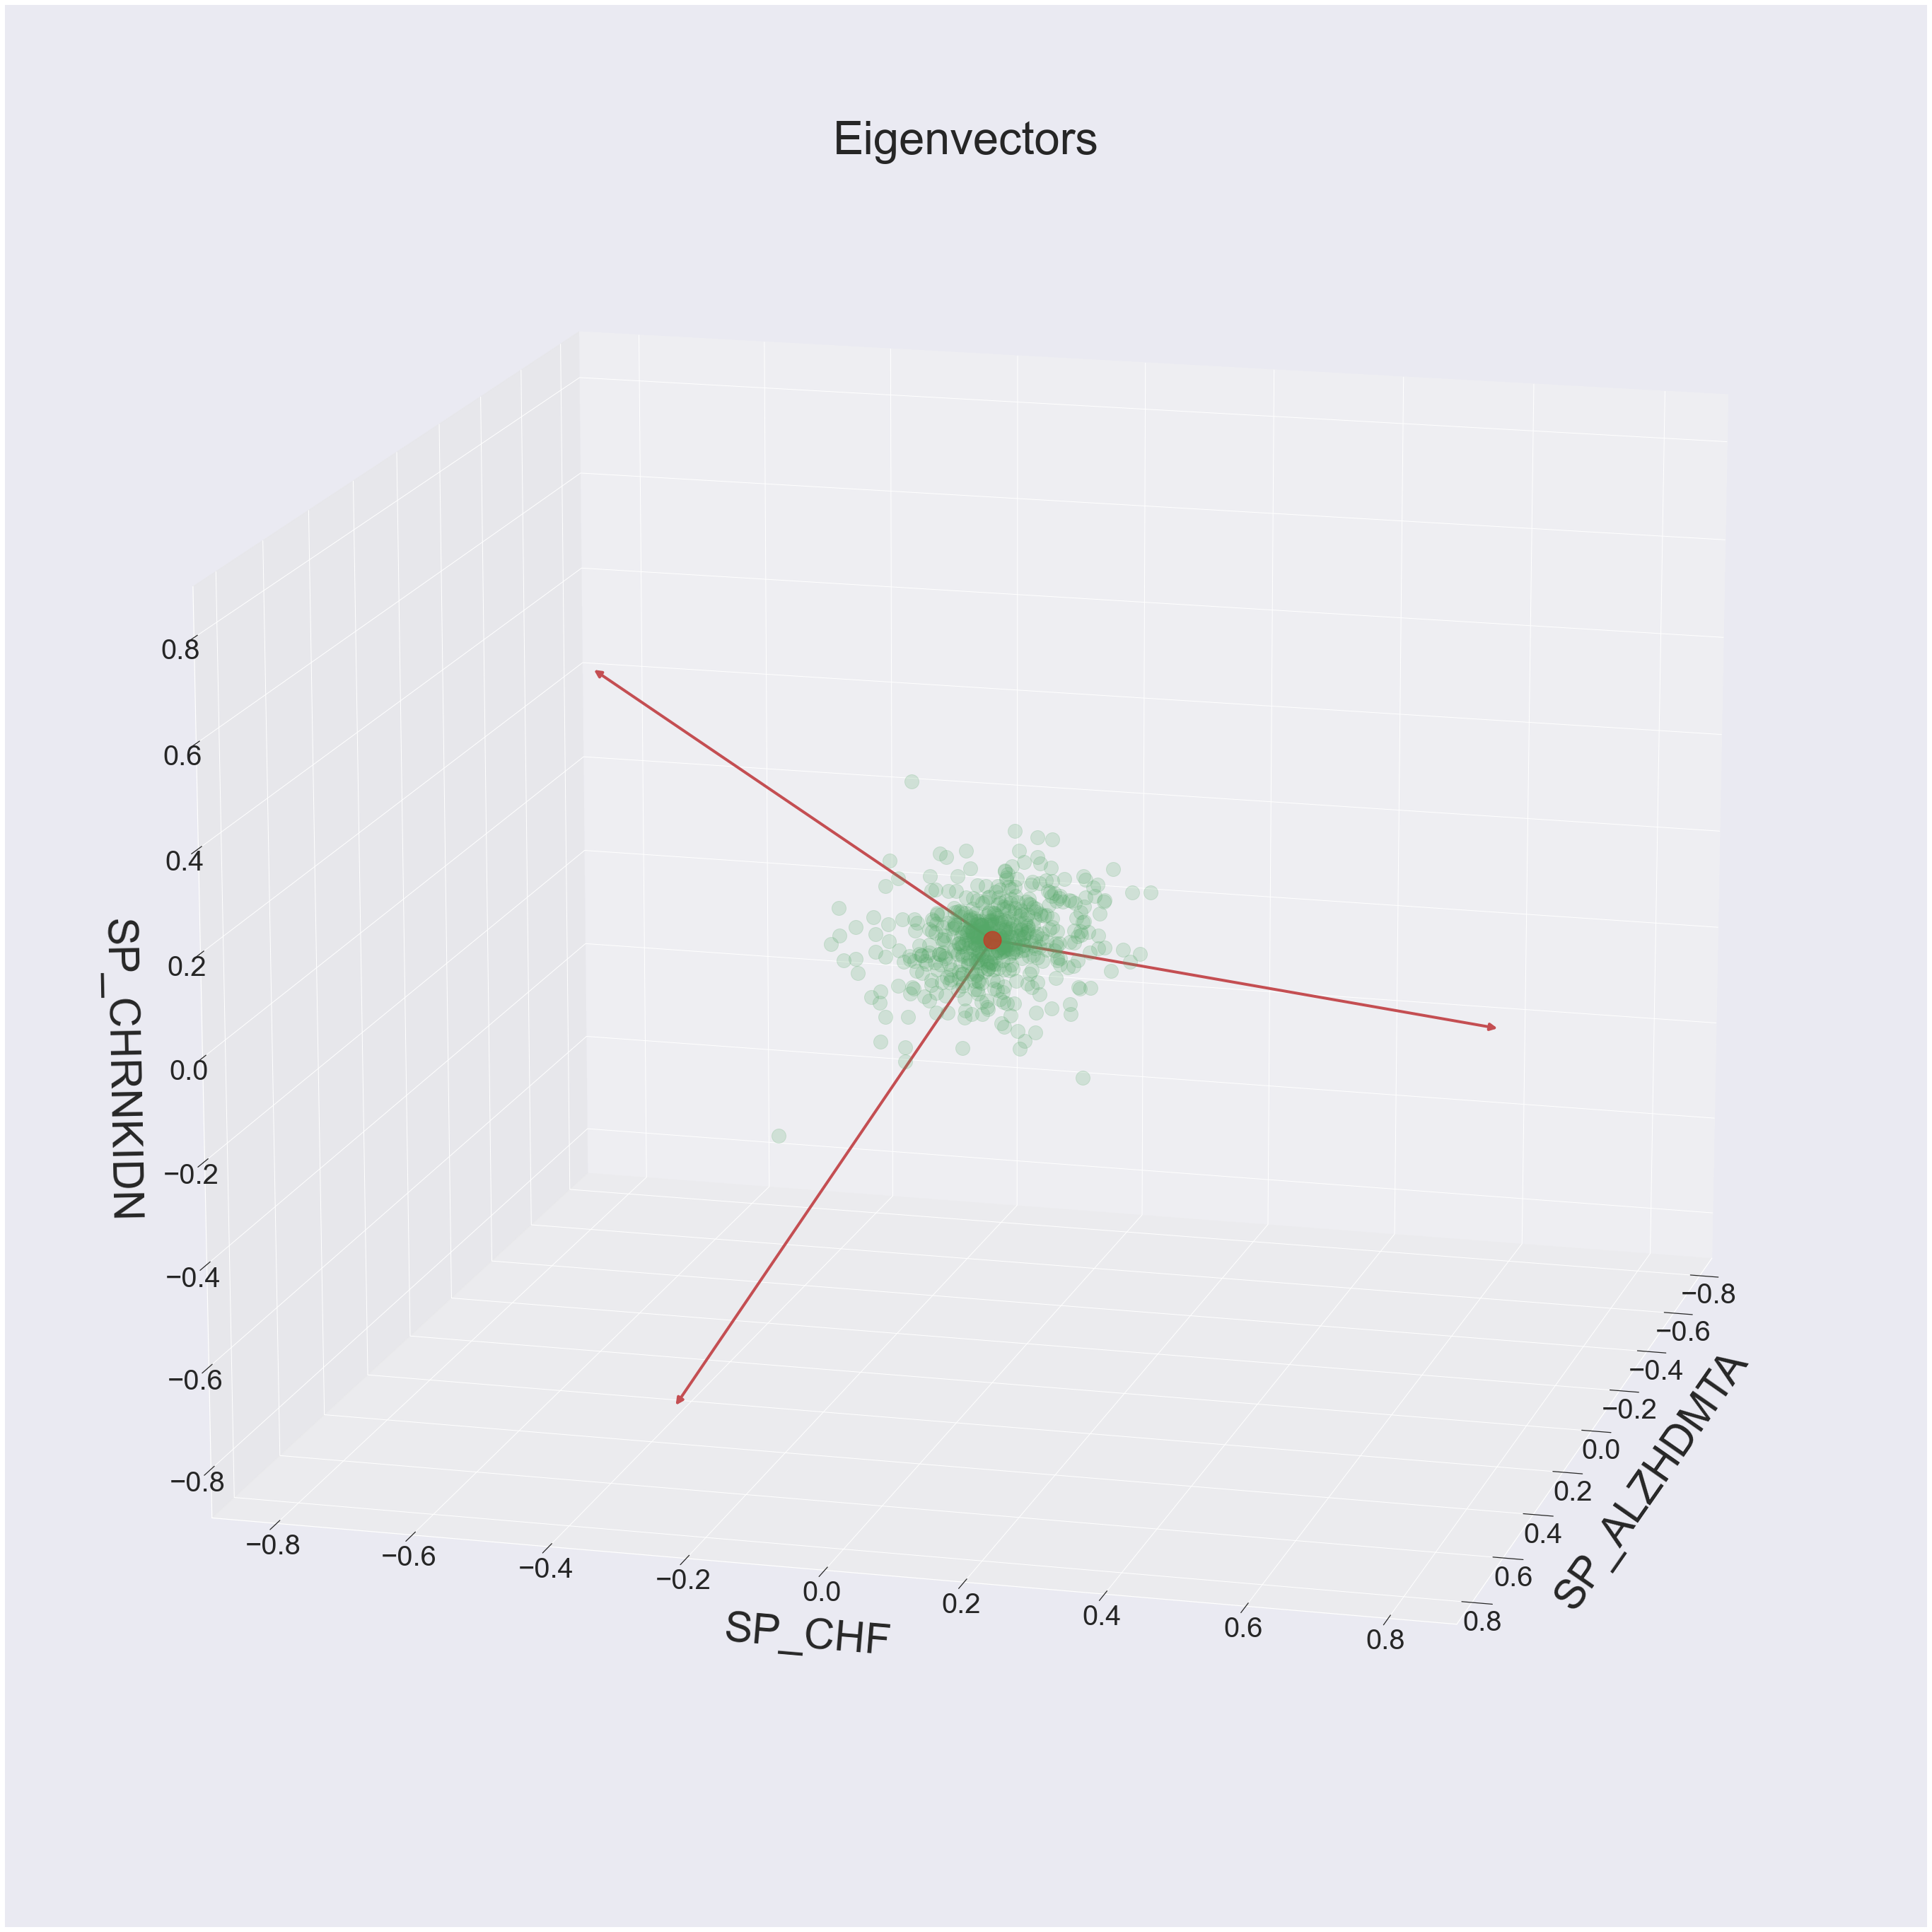

In [125]:
################################
#plotting eigenvectors
# source: https://www.semicolonworld.com/question/59258/putting-arrowheads-on-vectors-in-matplotlib-39-s-3d-plot
################################    

fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111, projection='3d')

ax.plot(normalized['SP_ALZHDMTA'], normalized['SP_CHF'], normalized['SP_CHRNKIDN'], 
        'o', markersize=20, color='g', alpha=0.2)


# mean values
mean_x = mean(normalized['SP_ALZHDMTA'])
mean_y = mean(normalized['SP_CHF'])
mean_z = mean(normalized['SP_CHRNKIDN'])
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=25, color='red', alpha=0.5)

for v in vectors:
    #ax.plot([mean_x,v[0]], [mean_y,v[1]], [mean_z,v[2]], color='red', alpha=0.8, lw=3)
    #I will replace this line with:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, v[2]], mutation_scale=20, 
                lw=4, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('SP_ALZHDMTA', fontsize=60, labelpad=50)
ax.set_ylabel('SP_CHF', fontsize=60, labelpad=50)
ax.set_zlabel('SP_CHRNKIDN', fontsize=60, labelpad=50)

ax.set_xlim3d(-.86, .86)
ax.set_ylim3d(-.86, .86)
ax.set_zlim3d(-.86, .86)
ax.view_init(15, 15)

ax.tick_params(axis='both', which='major', labelsize=40)
ax.tick_params(axis='both', which='minor', labelsize=40)


plt.title('Eigenvectors', fontsize=65, y=1.0001)

plt.draw()
plt.show()

In [126]:
explained_variance=values/sum(values)

In [127]:
explained_variance

array([0.51445732, 0.26374262, 0.22180006])

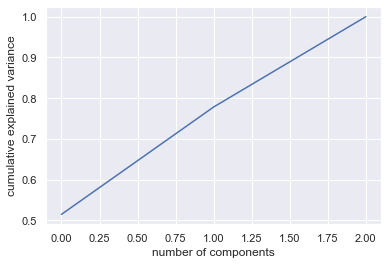

In [128]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [129]:
# Try adding more components

In [130]:
pca_ad.columns

Index(['SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD',
       'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA',
       'SP_STRKETIA', 'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP',
       'BENRES_OP', 'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR'],
      dtype='object')

In [131]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array(pca_ad)#[['SP_ALZHDMTA', 'SP_CHF','SP_CHRNKIDN','SP_CNCR']])#array([[1, 2], [3, 4], [5, 6], [7,8], [9,10]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means - a method of scaling - so skip for now
C = A - M
print(C)

# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

#create normalized df to help with plotting
normalized = pd.DataFrame(C)
normalized.columns = pca_ad.columns

[[1.50000000e+00 1.46153846e+00 1.65384615e+00 ... 2.25769231e+03
  6.67692308e+02 1.50000000e+01]
 [1.74074074e+00 1.64197531e+00 1.79012346e+00 ... 1.74037037e+03
  5.20617284e+02 4.95061728e+01]
 [1.72413793e+00 1.50574713e+00 1.74712644e+00 ... 2.03206897e+03
  5.89425287e+02 5.31034483e+01]
 ...
 [1.66249495e+00 1.49697214e+00 1.67258781e+00 ... 2.34940654e+03
  6.58292289e+02 3.69963666e+01]
 [1.60606061e+00 1.57575758e+00 1.75757576e+00 ... 2.73787879e+03
  7.35454545e+02 2.12121212e+01]
 [1.59154930e+00 1.42253521e+00 1.67605634e+00 ... 2.36098592e+03
  6.20985915e+02 4.00000000e+01]]
[1.66959882e+00 1.49965513e+00 1.67953089e+00 1.86955207e+00
 1.73408504e+00 1.62681074e+00 1.33656102e+00 1.29671688e+00
 1.69678729e+00 1.69055450e+00 1.90999939e+00 4.23745632e+03
 4.75071812e+02 2.22722102e+02 1.12113909e+03 3.54570835e+02
 3.89057009e+01 2.32157077e+03 6.54136643e+02 3.91750177e+01]
[[-1.69598824e-01 -3.81166719e-02 -2.56847365e-02 ... -6.38784658e+01
   1.35556647e+01 -2.417

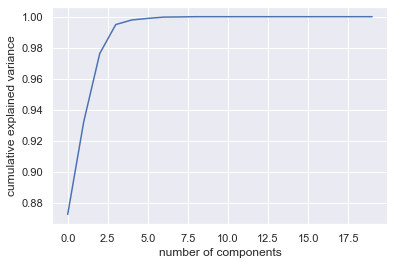

In [132]:
explained_variance=values/sum(values)
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
